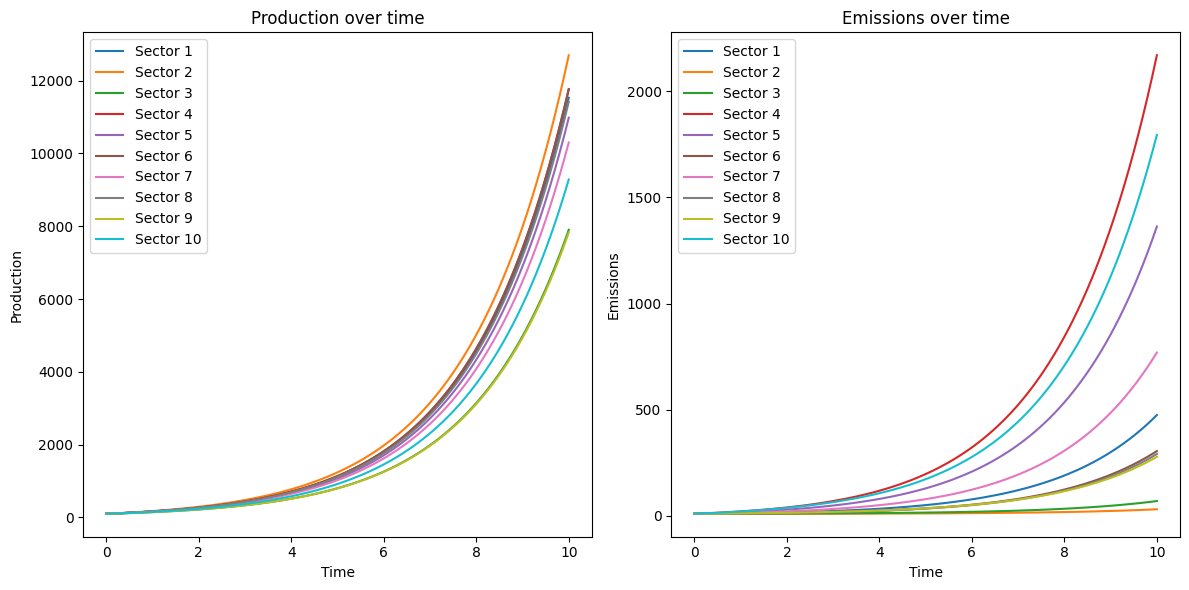

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Initial conditions for production and emissions
initial_production = np.ones(10) * 100  # Example initial production values
initial_emissions = np.ones(10) * 10    # Example initial emissions values

# Combine into a single initial conditions vector
initial_conditions = np.concatenate([initial_production, initial_emissions])

# Define the system of differential equations
def feedback_production(production, demand_matrix):
    return np.dot(demand_matrix, production)

def feedback_emissions(production, emissions_factors):
    return emissions_factors * production

def system_dynamics(y, t, demand_matrix, emissions_factors, external_shocks):
    num_sectors = len(demand_matrix)
    production = y[:num_sectors]
    emissions = y[num_sectors:]

    production_change = feedback_production(production, demand_matrix) + external_shocks(t)
    emissions_change = feedback_emissions(production, emissions_factors)

    return np.concatenate([production_change, emissions_change])

# Define the external shocks function
def external_shocks(t):
    # Example external shock function, you can modify this as needed
    return np.sin(t) * np.ones(10)

# Time vector for simulation
t = np.linspace(0, 10, 100)

# Example demand matrix and emissions factors
demand_matrix = np.random.rand(10, 10) * 0.1  # Ensuring the interaction values are not too large
emissions_factors = np.random.rand(10) * 0.1  # Example emissions factors

# Perform the simulation
result = odeint(system_dynamics, initial_conditions, t, args=(demand_matrix, emissions_factors, external_shocks))

# Extract results
production_result = result[:, :10]
emissions_result = result[:, 10:]

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(production_result.shape[1]):
    plt.plot(t, production_result[:, i], label=f'Sector {i+1}')
plt.title('Production over time')
plt.xlabel('Time')
plt.ylabel('Production')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(emissions_result.shape[1]):
    plt.plot(t, emissions_result[:, i], label=f'Sector {i+1}')
plt.title('Emissions over time')
plt.xlabel('Time')
plt.ylabel('Emissions')
plt.legend()

plt.tight_layout()
plt.show()
